In [1]:
import pandas as pd # Package for more progressive data objects, DataFrames.
import numpy as np # Maths package for more advanced numericle functions and supportive to Pandas
import matplotlib.pyplot as plt # Visual Package

In [2]:
filepath = r"C:\Users\Jonathan McAwesome\Dropbox\Projects\vmprework\Source Documentation\Data intern test (1).xlsx"
raw_df = pd.read_excel(filepath)

In [3]:
# Getting a sense of the data
raw_df.head()

,vicinity_id,created_at,url
0,b6244175-d568-4913-9a18-49d1db05e491,2019-12-17 08:00:00,https://www.timeslive.co.za/tshisa-live/tshisa...
1,2ce61236-438b-49f8-b385-42210ef00a24,2019-12-17 08:00:00,https://www.timeslive.co.za/
2,73cc1a66-7e8d-49b9-9b9c-24ad108d7b09,2019-12-17 08:00:02,https://www.timeslive.co.za/news/south-africa/...
3,e421b5a2-b07b-42b0-a227-0eea7d1a70e4,2019-12-17 08:00:00,https://www.timeslive.co.za/news/south-africa/...
4,49ada878-e767-42df-a357-bf5e92528b8b,2019-12-17 08:00:00,https://www.timeslive.co.za/


In [4]:
# Getting a sense of the data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50471 entries, 0 to 50470
Data columns (total 3 columns):
vicinity_id    50471 non-null object
created_at     50471 non-null datetime64[ns]
url            50471 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 1.2+ MB


In [5]:
# Checking that the time stamped data only falls within the paramaters given by brief.
print(min(raw_df['created_at']))
print(max(raw_df['created_at']))

2019-12-17 08:00:00
2019-12-17 09:00:00


In [6]:
# Need to remove ID's not apearing at least 3 times

# Best way to get value counts from DataFram Column - Stack Overflow Reading:
# https://stackoverflow.com/questions/22320356/pandas-get-values-from-column-that-appear-more-than-x-times/22320567

# Is in as filter criteria using Pandas
# https://stackoverflow.com/questions/48628417/how-to-select-rows-in-pandas-dataframe-where-value-appears-more-than-once

url_cnts = raw_df.vicinity_id.value_counts()
url_cnts[url_cnts >= 3].index
regular_user_df = raw_df[raw_df.vicinity_id.isin(url_cnts[url_cnts>=3].index)]

In [7]:
# Remove hits on the base url as they don't reveal article viewed information
regular_user_df = regular_user_df[regular_user_df['url']!="https://www.timeslive.co.za/"]

In [8]:
# Noted that I can cut out the catagory of articles read from the URL's

# Foundation testing for function 
test_url = "https://www.timeslive.co.za/tshisa-live/tshis/"
base_url = "https://www.timeslive.co.za/"
lenght_base_url = len(base_url)
cat_end = test_url.find("/",lenght_base_url)
test_url[lenght_base_url:cat_end]

def GET_CATAGORY(string_ip):
    
    cat_end = string_ip.find("/",lenght_base_url)
    return string_ip[lenght_base_url:cat_end]
    

    
# Foundation for testing function
test_url.count("/")

def GET_LASTURLPART(string_ip):
    x = 0
    y = 0
    list_a = []
    while x < string_ip.count("/"):
        
        y = string_ip.find("/",y)+1
        list_a.append(y)
        x = x+1
    
    start, stop = list_a[-2:]
    
    return string_ip[start:stop-1]




In [9]:
# Return count of catagories hit by these regular users
regular_user_df['cleanedurl'] = regular_user_df['url'].apply(GET_CATAGORY)
# Store top five article catagories hit
top_five_catagories = regular_user_df.cleanedurl.value_counts()[0:5]

In [10]:
# Return count of articles hit by these regular users
regular_user_df['article'] = regular_user_df['url'].apply(GET_LASTURLPART)
# Store top five article hits
top_five_articles = regular_user_df.article.value_counts()[0:5].sort_values()


## Visualization 
<br>


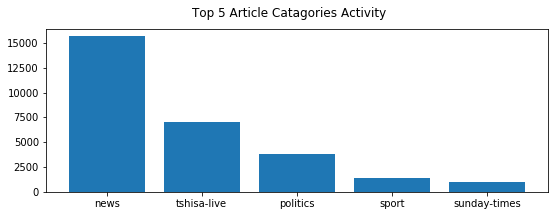

In [11]:
# Visual Top 5 Catagories
names = top_five_catagories.index
values = top_five_catagories.values

plt.figure(figsize=(9, 3))


plt.bar(names, values)

plt.suptitle('Top 5 Article Catagories Activity')
plt.show()

<BarContainer object of 5 artists>

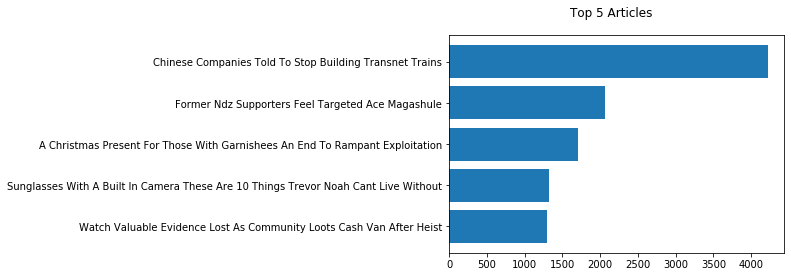

In [12]:
names_art = list(top_five_articles.index)

#Clean Names of Articles
a = 0
for i in names_art:

    names_art[a] = i[11:].replace("-"," ").title()
    a = a+1

values_art = top_five_articles.values
fig, ax = plt.subplots()
plt.suptitle("Top 5 Articles")
ax.barh(names_art, values_art)